In [15]:
import torch
import torch.nn as nn
from torch.nn.functional import softmax
from torch.nn.functional import cross_entropy
from torchmetrics import F1Score
from torchvision import transforms

from torch.utils.data import DataLoader, Dataset
from models.resnet import ResNet18
from models.vgg import VGG16
from datasets.dataset_retrieval import custom_dataset
from torch.optim import SGD, Adam
from torch.utils.tensorboard import SummaryWriter
import tqdm

import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

import os

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


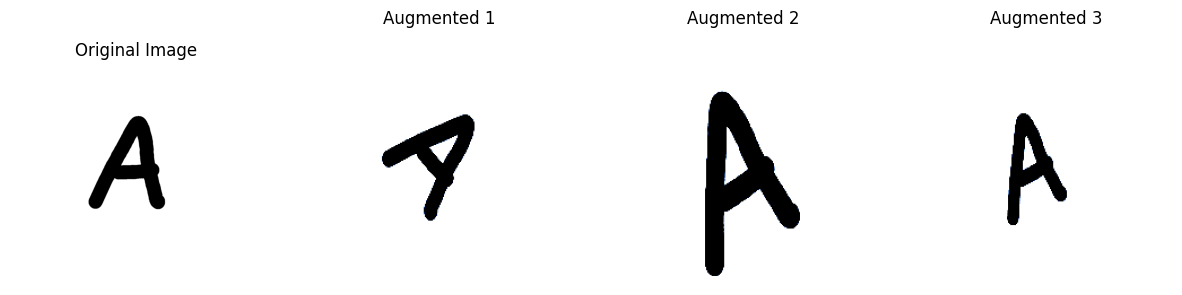

In [191]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torch

# Define the transformations for augmentations (as you mentioned earlier)
tr_train = transforms.Compose([
    # transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(45, fill=255),
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5, interpolation=3, fill=255),
    transforms.RandomAffine(degrees=0, scale=(0.6, 1.2), fill=255),  # Random zoom
    transforms.Resize([250, 250]),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# 1. Load a single image from file
image_path = 'datasets/demo_dataset/train/A_caps/A_caps.024.png'
original_image = Image.open(image_path)

# 2. Plot the original image and apply augmentations 3 times
plt.figure(figsize=(15, 5))

# Plot the original image in the first subplot
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Apply augmentations 3 times and plot the results
for i in range(3):
    augmented_image = tr_train(original_image)  # Apply augmentation

    # Plot the augmented image
    plt.subplot(1, 4, i+2)  # Subplot 2, 3, and 4
    plt.imshow(augmented_image.permute(1, 2, 0).numpy())  # Convert from [C, H, W] to [H, W, C]
    plt.title(f'Augmented {i+1}')
    plt.axis('off')

# Show the plot
plt.show()
